# # Test Analysis using Python

 Import packages and read data

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas as gpd
#import geoplot as gplt

In [3]:
os.chdir("C:\\everlytics")

In [4]:
data = pd.read_csv("Speed_dataset.csv")


In [5]:
data.tail(10)

,latitude,longitude,timestamp,speed_mph,speedlimit_mph,functionalClass,controlledAccess,isHighway,state,vehicle_id,driver_id
343618,34.389706,-77.893105,11/30/2015 23:47,3,55,4,N,1,NC,1191353,1163791
343619,34.764725,-78.996834,11/30/2015 23:49,63,65,1,Y,1,NC,1208979,5693
343620,34.978119,-78.127838,11/30/2015 23:51,65,70,2,Y,1,NC,1280223,916461
343621,35.658798,-78.092133,11/30/2015 23:51,64,70,1,Y,1,NC,1462,1222453
343622,35.568218,-78.341431,11/30/2015 23:51,52,55,2,N,1,NC,550272,1305549
343623,36.299755,-76.251152,11/30/2015 23:51,46,50,3,N,0,NC,607681,991329
343624,34.622124,-79.050201,11/30/2015 23:51,11,35,4,N,0,NC,1351613,322085
343625,35.548748,-78.304947,11/30/2015 23:51,4,45,4,N,0,NC,550768,1288064
343626,35.822601,-79.572960,11/30/2015 23:52,65,65,2,Y,1,NC,617989,1272718
343627,36.063713,-79.930313,11/30/2015 23:53,16,55,5,N,1,NC,565771,1159793


In [7]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns



In [8]:
data.shape  ## 3,43,628 ,11

(343628, 11)

In [9]:
missing_values_table(data)   ## no missing data 

Your selected dataframe has 11 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Data exploration

In [10]:
data.columns

#Index(['latitude', 'longitude', 'timestamp', 'speed_mph', 'speedlimit_mph',
#      'functionalClass', 'controlledAccess', 'isHighway', 'state',
#       'vehicle_id', 'driver_id'],
#     dtype='object')


Index(['latitude', 'longitude', 'timestamp', 'speed_mph', 'speedlimit_mph',
       'functionalClass', 'controlledAccess', 'isHighway', 'state',
       'vehicle_id', 'driver_id'],
      dtype='object')

In [11]:
data['timestamp'] =  pd.to_datetime(data['timestamp'])   #6/1/2015 0:04

In [12]:
data.timestamp.dtype

dtype('<M8[ns]')

In [ ]:
data.timestamp.head(10)

In [22]:
data['state'].value_counts()
data['functionalClass'].value_counts()
data['controlledAccess'].value_counts()
data['isHighway'].value_counts()
data['vehicle_id'].isna()
data.describe()

,latitude,longitude,speed_mph,speedlimit_mph,functionalClass,isHighway,vehicle_id,driver_id
count,343628.000000,343628.000000,343628.000000,343628.000000,343628.000000,343628.000000,3.436280e+05,3.436280e+05
mean,35.504742,-78.495537,38.176129,54.442391,3.040398,0.683640,8.401167e+05,5.650171e+05
std,0.794903,0.910243,24.945979,10.014904,1.368529,0.465056,5.027187e+05,5.193492e+05
min,33.318760,-84.402771,1.000000,20.000000,0.000000,0.000000,1.429000e+03,0.000000e+00
25%,35.005116,-78.926933,10.000000,45.000000,2.000000,0.000000,5.350240e+05,3.871900e+04
50%,35.531018,-78.458893,44.000000,55.000000,3.000000,1.000000,6.179890e+05,4.662930e+05
75%,35.794942,-78.122360,64.000000,65.000000,4.000000,1.000000,1.207151e+06,1.144565e+06
max,38.641785,-75.599670,79.000000,70.000000,5.000000,1.000000,1.889852e+06,1.393454e+06


In [23]:
overspeed =[]

for i in range (0,343628):
        if data.iloc[i,3] > data.iloc[i,4]:
                overspeed.append('1')
        else:
            overspeed.append('0')
   

In [24]:


overspeed = pd.DataFrame(overspeed)

In [25]:
overspeed.shape


(343628, 1)

In [26]:
data = pd.concat([data,overspeed],axis=1)


In [27]:
data.columns


Index([        'latitude',        'longitude',        'timestamp',
              'speed_mph',   'speedlimit_mph',  'functionalClass',
       'controlledAccess',        'isHighway',            'state',
             'vehicle_id',        'driver_id',        'Overspeed',
                        0],
      dtype='object')

In [28]:
data = data.rename(columns={ data.columns[11]: "Overspeed" })

In [29]:
overs = pd.DataFrame(data['Overspeed'].value_counts())
overs['YesNo'] = ['0','1']

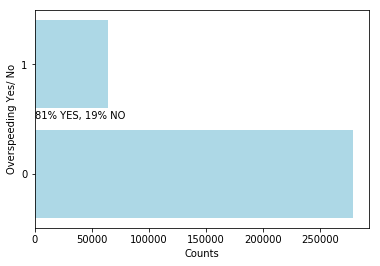

In [30]:

plt.barh(overs.YesNo, overs.Overspeed,align='center',
        color='lightblue')
plt.ylabel('Overspeeding Yes/ No')
plt.xlabel('Counts')
plt.text(-2,0.5,'81% YES, 19% NO')
plt.show()

# to check during what time overspeeding occurs most

In [31]:
data['time']= data['timestamp'].dt.time

In [32]:
data_bytime =  pd.concat([data.time,data.Overspeed], axis=1)


In [ ]:
data_bytime.sort_values(by=['time'])

In [34]:
data_bytime[['h','m','s']] = data_bytime['time'].astype(str).str.split(':', expand=True).astype(int)

Text(0.5,1,'Hourly distribution of Overspeeding cases')

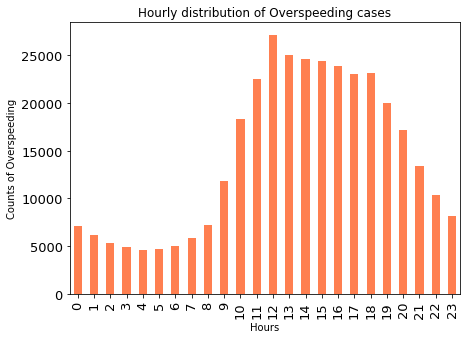

In [35]:
data_bytime.groupby('h')['Overspeed'].count().plot(kind='bar', figsize=(7,5),
                                        color="coral", fontsize=13)
plt.xlabel("Hours")
plt.ylabel("Counts of Overspeeding")
plt.title("Hourly distribution of Overspeeding cases")

Violin plot for  Speed mph

In [ ]:
sns.set(style="whitegrid")
hourspeed =data_bytime.groupby('h')['Overspeed'].count()
hourspeed = pd.DataFrame(hourspeed)
hourspeed.columns = ['Overspeed']
hourspeed['Hours']=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
hourspeed['Hours'].astype(int)

In [38]:
hourspeed = hourspeed.sort_values(by=['Hours'])

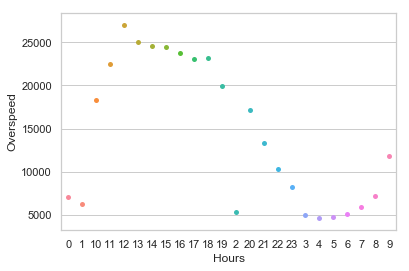

In [37]:

sns.swarmplot(x="Hours", y="Overspeed", data=hourspeed)

In [39]:
data_byfunclass = data.groupby('functionalClass')['Overspeed'].count()
data_byfunclass= pd.DataFrame(data_byfunclass)
data_byfunclass.columns = ['Overspeed']
data_byfunclass['Funclass']=['0','1','2','3','4','5']
data_byfunclass['Funclass'].astype(int)

functionalClass
0    0
1    1
2    2
3    3
4    4
5    5
Name: Funclass, dtype: int32

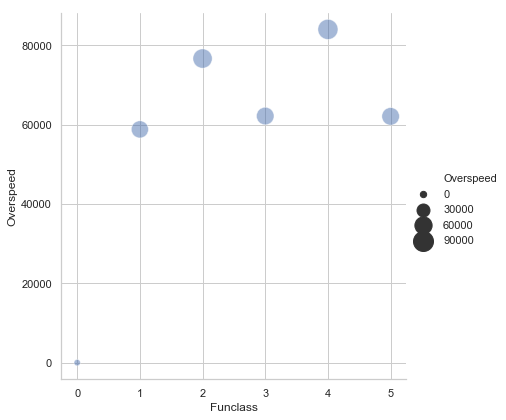

In [30]:
g=sns.relplot(x="Funclass", y="Overspeed",size="Overspeed",
            sizes=(40, 400), alpha=.5,
            height=6, data=data_byfunclass)
g.set_titles("Functional Class of road")

In [40]:
data_byaccess = data.groupby('controlledAccess')['Overspeed'].count()
data_byaccess= pd.DataFrame(data_byaccess)
data_byaccess.columns = ['Overspeed']
data_byaccess['AccessControl']=['0','1']
data_byaccess['AccessControl'].astype(int)

controlledAccess
N    0
Y    1
Name: AccessControl, dtype: int32

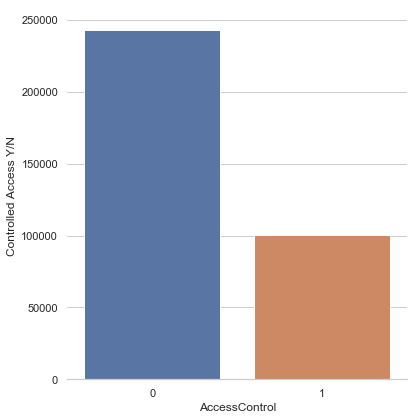

In [41]:
p = sns.catplot(x="AccessControl", y="Overspeed", data=data_byaccess,
                height=6, kind="bar")
p.despine(left=True)
p.set_ylabels("Controlled Access Y/N")

In [42]:
data_by2 = data.groupby(['controlledAccess','functionalClass'])['Overspeed'].count()

In [43]:
data_by2 = pd.DataFrame(data_by2)
data_by2.columns


data_by2['AccessControl']=['0','0','0','0','0','1','1','1','1']
data_by2['AccessControl'].astype(int)
data_by2['funclass']=['0','2','3','4','5','1','2','3','4']
data_by2['funclass'].astype(int)


controlledAccess  functionalClass
N                 0                  0
                  2                  2
                  3                  3
                  4                  4
                  5                  5
Y                 1                  1
                  2                  2
                  3                  3
                  4                  4
Name: funclass, dtype: int32

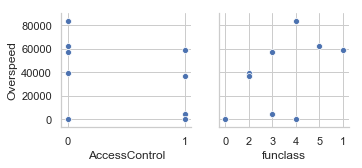

In [44]:
pp = sns.pairplot(data=data_by2,
                  y_vars=['Overspeed'],
                  x_vars=['AccessControl','funclass'],
                  )

Geospatial data

In [ ]:
import geopandas as gpd
import geoplot as gplt

%matplotlib inline